#using requests

In [ ]:
#this website is called macrotrends
#this script is designed to scrape its financial statements
#yahoo finance only contains the recent 5 year
#macrotrends can trace back to 2005 if applicable
import re
import json
import pandas as pd
import requests
import os

In [ ]:
#simply scrape
def scrape(url,**kwargs):

    session=requests.Session()
    session.headers.update(
            {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.121 Safari/537.36'})

    response=session.get(url,**kwargs)

    return response

In [ ]:

#create dataframe
def etl(response):

    #regex to find the data
    num=re.findall('(?<=div\>\"\,)[0-9\.\"\:\-\, ]*',response.text)
    text=re.findall('(?<=s\: \')\S+(?=\'\, freq)',response.text)

    #convert text to dict via json
    dicts=[json.loads('{'+i+'}') for i in num]

    #create dataframe
    df=pd.DataFrame()
    for ind,val in enumerate(text):
        df[val]=dicts[ind].values()
    df.index=dicts[ind].keys()

    return df




In [ ]:
url='https://www.macrotrends.net/stocks/charts/AAPL/apple/financial-statements'
response=scrape(url)
df=etl(response)
df.to_csv('aapl financial statements.csv')


In [ ]:
df

,revenue,cost-goods-sold,gross-profit,research-development-expenses,selling-general-administrative-expenses,operating-expenses,operating-income,total-non-operating-income-expense,pre-tax-income,total-provision-income-taxes,income-after-taxes,income-from-continuous-operations,net-income,ebitda,ebit,basic-shares-outstanding,shares-outstanding,eps-basic-net-earnings-per-share,eps-earnings-per-share-diluted
2023-09-30,383285.00000,214137.00000,169148.00000,29915.00000,24932.00000,54847.00000,114301.00000,-565.00000,113736.00000,16741.00000,96995.00000,96995.00000,96995.00000,125820.00000,114301.00000,15744.23000,15812.55000,6.16000,6.13000
2022-09-30,394328.00000,223546.00000,170782.00000,26251.00000,25094.00000,51345.00000,119437.00000,-334.00000,119103.00000,19300.00000,99803.00000,99803.00000,99803.00000,130541.00000,119437.00000,16215.96000,16325.82000,6.15000,6.11000
2021-09-30,365817.00000,212981.00000,152836.00000,21914.00000,21973.00000,43887.00000,108949.00000,258.00000,109207.00000,14527.00000,94680.00000,94680.00000,94680.00000,120233.00000,108949.00000,16701.27000,16864.92000,5.67000,5.61000
2020-09-30,274515.00000,169559.00000,104956.00000,18752.00000,19916.00000,38668.00000,66288.00000,803.00000,67091.00000,9680.00000,57411.00000,57411.00000,57411.00000,77344.00000,66288.00000,17352.12000,17528.21000,3.31000,3.28000
2019-09-30,260174.00000,161782.00000,98392.00000,16217.00000,18245.00000,34462.00000,63930.00000,1807.00000,65737.00000,10481.00000,55256.00000,55256.00000,55256.00000,76477.00000,63930.00000,18471.34000,18595.65000,2.99000,2.97000
2018-09-30,265595.00000,163756.00000,101839.00000,14236.00000,16705.00000,30941.00000,70898.00000,2005.00000,72903.00000,13372.00000,59531.00000,59531.00000,59531.00000,81801.00000,70898.00000,19821.51000,20000.44000,3.00000,2.98000
2017-09-30,229234.00000,141048.00000,88186.00000,11581.00000,15261.00000,26842.00000,61344.00000,2745.00000,64089.00000,15738.00000,48351.00000,48351.00000,48351.00000,71501.00000,61344.00000,20868.97000,21006.77000,2.31750,2.30250
2016-09-30,215639.00000,131376.00000,84263.00000,10045.00000,14194.00000,24239.00000,60024.00000,1348.00000,61372.00000,15685.00000,45687.00000,45687.00000,45687.00000,70529.00000,60024.00000,21883.28000,22001.12000,2.08750,2.07750
2015-09-30,233715.00000,140089.00000,93626.00000,8067.00000,14329.00000,22396.00000,71230.00000,1285.00000,72515.00000,19121.00000,53394.00000,53394.00000,53394.00000,82487.00000,71230.00000,23013.68000,23172.28000,2.32000,2.30500
2014-09-30,182795.00000,112258.00000,70537.00000,6041.00000,11993.00000,18034.00000,52503.00000,980.00000,53483.00000,13973.00000,39510.00000,39510.00000,39510.00000,60449.00000,52503.00000,24342.29000,24490.65000,1.62250,1.61250


In [ ]:
df.head(5)

,revenue,cost-goods-sold,gross-profit,research-development-expenses,selling-general-administrative-expenses,operating-expenses,operating-income,total-non-operating-income-expense,pre-tax-income,total-provision-income-taxes,income-after-taxes,income-from-continuous-operations,net-income,ebitda,ebit,basic-shares-outstanding,shares-outstanding,eps-basic-net-earnings-per-share,eps-earnings-per-share-diluted
2023-09-30,383285.00000,214137.00000,169148.00000,29915.00000,24932.00000,54847.00000,114301.00000,-565.00000,113736.00000,16741.00000,96995.00000,96995.00000,96995.00000,125820.00000,114301.00000,15744.23000,15812.55000,6.16000,6.13000
2022-09-30,394328.00000,223546.00000,170782.00000,26251.00000,25094.00000,51345.00000,119437.00000,-334.00000,119103.00000,19300.00000,99803.00000,99803.00000,99803.00000,130541.00000,119437.00000,16215.96000,16325.82000,6.15000,6.11000
2021-09-30,365817.00000,212981.00000,152836.00000,21914.00000,21973.00000,43887.00000,108949.00000,258.00000,109207.00000,14527.00000,94680.00000,94680.00000,94680.00000,120233.00000,108949.00000,16701.27000,16864.92000,5.67000,5.61000
2020-09-30,274515.00000,169559.00000,104956.00000,18752.00000,19916.00000,38668.00000,66288.00000,803.00000,67091.00000,9680.00000,57411.00000,57411.00000,57411.00000,77344.00000,66288.00000,17352.12000,17528.21000,3.31000,3.28000
2019-09-30,260174.00000,161782.00000,98392.00000,16217.00000,18245.00000,34462.00000,63930.00000,1807.00000,65737.00000,10481.00000,55256.00000,55256.00000,55256.00000,76477.00000,63930.00000,18471.34000,18595.65000,2.99000,2.97000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 2023-09-30 to 2009-09-30
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   revenue                                  15 non-null     object
 1   cost-goods-sold                          15 non-null     object
 2   gross-profit                             15 non-null     object
 3   research-development-expenses            15 non-null     object
 4   selling-general-administrative-expenses  15 non-null     object
 5   operating-expenses                       15 non-null     object
 6   operating-income                         15 non-null     object
 7   total-non-operating-income-expense       15 non-null     object
 8   pre-tax-income                           15 non-null     object
 9   total-provision-income-taxes             15 non-null     object
 10  income-after-taxes                       15 non-null

In [ ]:
# Convert object columns to numeric
numeric_columns = df.columns.tolist()
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 2023-09-30 to 2009-09-30
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   revenue                                  15 non-null     float64
 1   cost-goods-sold                          15 non-null     float64
 2   gross-profit                             15 non-null     float64
 3   research-development-expenses            15 non-null     float64
 4   selling-general-administrative-expenses  15 non-null     float64
 5   operating-expenses                       15 non-null     float64
 6   operating-income                         15 non-null     float64
 7   total-non-operating-income-expense       15 non-null     float64
 8   pre-tax-income                           15 non-null     float64
 9   total-provision-income-taxes             15 non-null     float64
 10  income-after-taxes                      

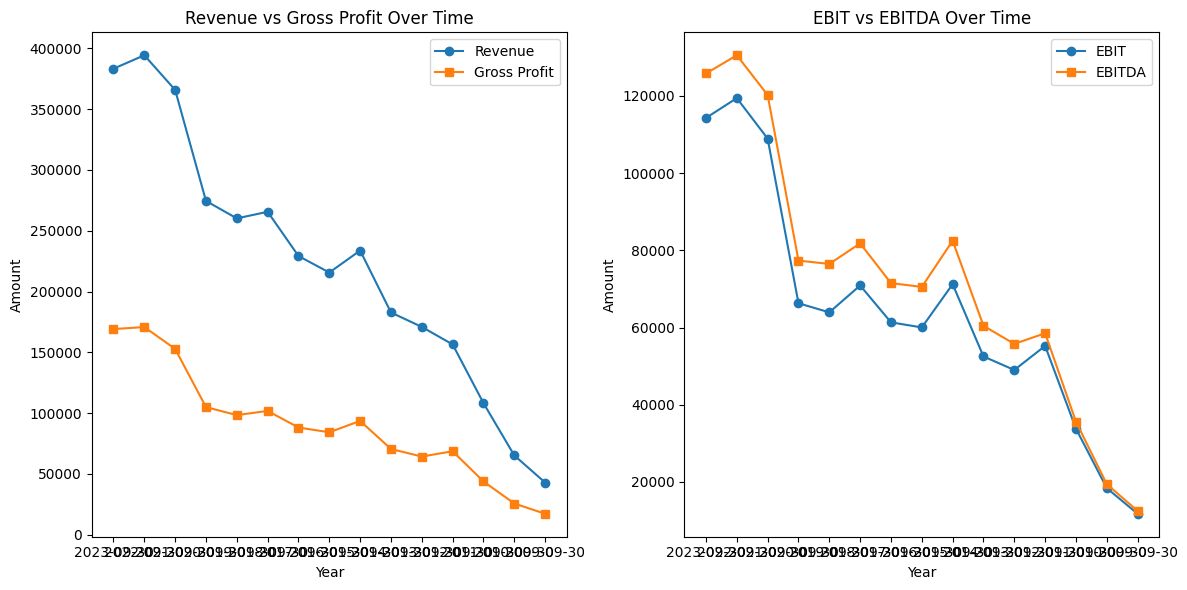

In [ ]:

import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(12, 6))

# Plotting revenue and gross profit
plt.subplot(1, 2, 1)
plt.plot(df.index, df['revenue'], label='Revenue', marker='o')
plt.plot(df.index, df['gross-profit'], label='Gross Profit', marker='s')
plt.title('Revenue vs Gross Profit Over Time')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()

# Plotting EBIT and EBITDA
plt.subplot(1, 2, 2)
plt.plot(df.index, df['ebit'], label='EBIT', marker='o')
plt.plot(df.index, df['ebitda'], label='EBITDA', marker='s')
plt.title('EBIT vs EBITDA Over Time')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()

plt.tight_layout()
plt.show()

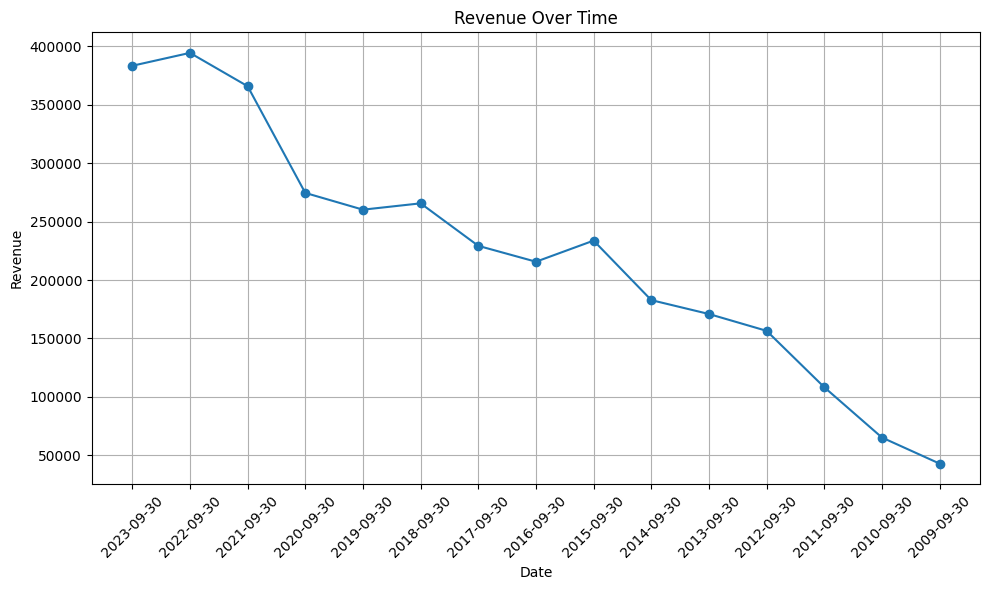

In [ ]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['revenue'], marker='o')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Revenue Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


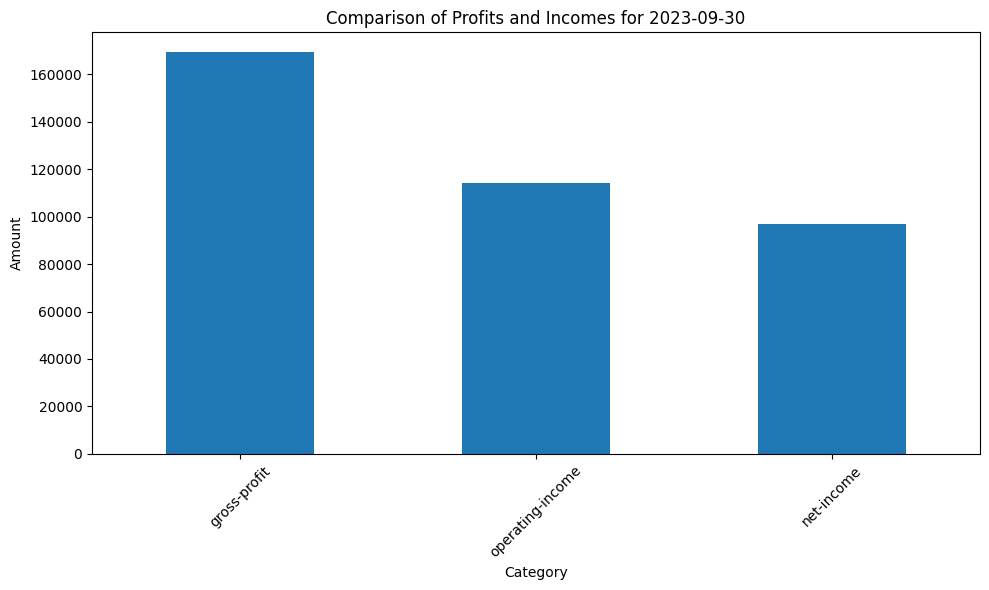

In [ ]:
plt.figure(figsize=(10, 6))
df.loc['2023-09-30', ['gross-profit', 'operating-income', 'net-income']].plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.title('Comparison of Profits and Incomes for 2023-09-30')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


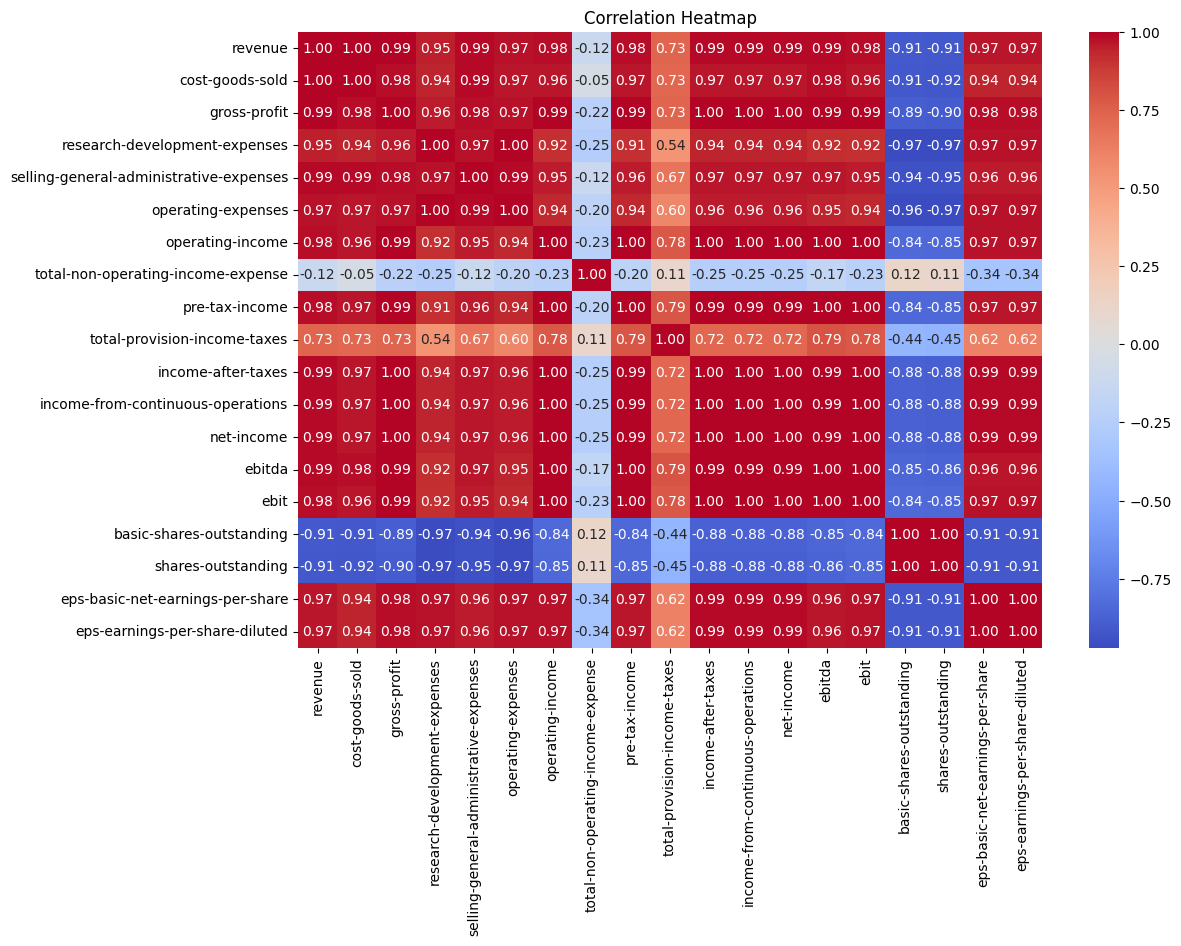

In [ ]:
import seaborn as sns

# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


#using BeautifulSoup

In [ ]:
import re
import json
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [ ]:

# Function to scrape data using BeautifulSoup
def scrape_with_bs(url):
    # Set user agent
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.121 Safari/537.36'}

    # Send request to the URL
    response = requests.get(url, headers=headers)

    # Check if the request was successful
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        return soup
    else:
        print(f"Error accessing URL: {response.status_code}")
        return None


In [ ]:
# Function to extract and transform data
def etl_bs(soup):
    # Find all script tags
    scripts = soup.find_all('script')

    # Initialize variables to store data
    data_str = ""

    # Loop through script tags to find the data
    for script in scripts:
        # Check if the script contains financial data
        if 'var originalData' in str(script):
            data_str = str(script)
            break

    # Check if data_str is not empty
    if data_str:
        # Extract numeric data using regex
        num_match = re.search(r'(?<=data:\s)\[\s*({.*?})\s*\]', data_str)
        if num_match:
            num_data = num_match.group(1)
            num_data = num_data.replace("'", '"')  # Replace single quotes with double quotes for valid JSON
            dicts = json.loads(num_data)
        else:
            print("Error: Unable to extract numeric data.")
            return None

        # Extract text data using regex
        text_match = re.search(r'(?<=title:\s\').*?(?=\',)', data_str)
        if text_match:
            text_data = text_match.group(0)
            text = [text_data] * len(dicts)
        else:
            print("Error: Unable to extract text data.")
            return None

        # Create DataFrame
        df = pd.DataFrame(dicts)
        df.index = text
        return df
    else:
        print("Error: No financial data found in the script.")
        return None



In [ ]:

# URL of the website to scrape
url = 'https://www.macrotrends.net/stocks/charts/AAPL/apple/financial-statements'

# Scrape data using BeautifulSoup
soup = scrape_with_bs(url)

if soup:
    soup=scrape(url)
    # Extract and transform data
    df = etl(soup)
    print(df)
    # Save DataFrame to CSV
    df.to_csv('aapl_financial_statements_bs.csv', index=True)
    print("Data saved successfully.")
else:
    print("Error accessing website.")


                 revenue cost-goods-sold  gross-profit  \
2023-09-30  383285.00000    214137.00000  169148.00000   
2022-09-30  394328.00000    223546.00000  170782.00000   
2021-09-30  365817.00000    212981.00000  152836.00000   
2020-09-30  274515.00000    169559.00000  104956.00000   
2019-09-30  260174.00000    161782.00000   98392.00000   
2018-09-30  265595.00000    163756.00000  101839.00000   
2017-09-30  229234.00000    141048.00000   88186.00000   
2016-09-30  215639.00000    131376.00000   84263.00000   
2015-09-30  233715.00000    140089.00000   93626.00000   
2014-09-30  182795.00000    112258.00000   70537.00000   
2013-09-30  170910.00000    106606.00000   64304.00000   
2012-09-30  156508.00000     87846.00000   68662.00000   
2011-09-30  108249.00000     64431.00000   43818.00000   
2010-09-30   65225.00000     39541.00000   25684.00000   
2009-09-30   42905.00000     25683.00000   17222.00000   

           research-development-expenses  \
2023-09-30                 

In [ ]:
df

,revenue,cost-goods-sold,gross-profit,research-development-expenses,selling-general-administrative-expenses,operating-expenses,operating-income,total-non-operating-income-expense,pre-tax-income,total-provision-income-taxes,income-after-taxes,income-from-continuous-operations,net-income,ebitda,ebit,basic-shares-outstanding,shares-outstanding,eps-basic-net-earnings-per-share,eps-earnings-per-share-diluted
2023-09-30,383285.00000,214137.00000,169148.00000,29915.00000,24932.00000,54847.00000,114301.00000,-565.00000,113736.00000,16741.00000,96995.00000,96995.00000,96995.00000,125820.00000,114301.00000,15744.23000,15812.55000,6.16000,6.13000
2022-09-30,394328.00000,223546.00000,170782.00000,26251.00000,25094.00000,51345.00000,119437.00000,-334.00000,119103.00000,19300.00000,99803.00000,99803.00000,99803.00000,130541.00000,119437.00000,16215.96000,16325.82000,6.15000,6.11000
2021-09-30,365817.00000,212981.00000,152836.00000,21914.00000,21973.00000,43887.00000,108949.00000,258.00000,109207.00000,14527.00000,94680.00000,94680.00000,94680.00000,120233.00000,108949.00000,16701.27000,16864.92000,5.67000,5.61000
2020-09-30,274515.00000,169559.00000,104956.00000,18752.00000,19916.00000,38668.00000,66288.00000,803.00000,67091.00000,9680.00000,57411.00000,57411.00000,57411.00000,77344.00000,66288.00000,17352.12000,17528.21000,3.31000,3.28000
2019-09-30,260174.00000,161782.00000,98392.00000,16217.00000,18245.00000,34462.00000,63930.00000,1807.00000,65737.00000,10481.00000,55256.00000,55256.00000,55256.00000,76477.00000,63930.00000,18471.34000,18595.65000,2.99000,2.97000
2018-09-30,265595.00000,163756.00000,101839.00000,14236.00000,16705.00000,30941.00000,70898.00000,2005.00000,72903.00000,13372.00000,59531.00000,59531.00000,59531.00000,81801.00000,70898.00000,19821.51000,20000.44000,3.00000,2.98000
2017-09-30,229234.00000,141048.00000,88186.00000,11581.00000,15261.00000,26842.00000,61344.00000,2745.00000,64089.00000,15738.00000,48351.00000,48351.00000,48351.00000,71501.00000,61344.00000,20868.97000,21006.77000,2.31750,2.30250
2016-09-30,215639.00000,131376.00000,84263.00000,10045.00000,14194.00000,24239.00000,60024.00000,1348.00000,61372.00000,15685.00000,45687.00000,45687.00000,45687.00000,70529.00000,60024.00000,21883.28000,22001.12000,2.08750,2.07750
2015-09-30,233715.00000,140089.00000,93626.00000,8067.00000,14329.00000,22396.00000,71230.00000,1285.00000,72515.00000,19121.00000,53394.00000,53394.00000,53394.00000,82487.00000,71230.00000,23013.68000,23172.28000,2.32000,2.30500
2014-09-30,182795.00000,112258.00000,70537.00000,6041.00000,11993.00000,18034.00000,52503.00000,980.00000,53483.00000,13973.00000,39510.00000,39510.00000,39510.00000,60449.00000,52503.00000,24342.29000,24490.65000,1.62250,1.61250


In [ ]:
# Convert object columns to numeric
numeric_columns = df.columns.tolist()
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

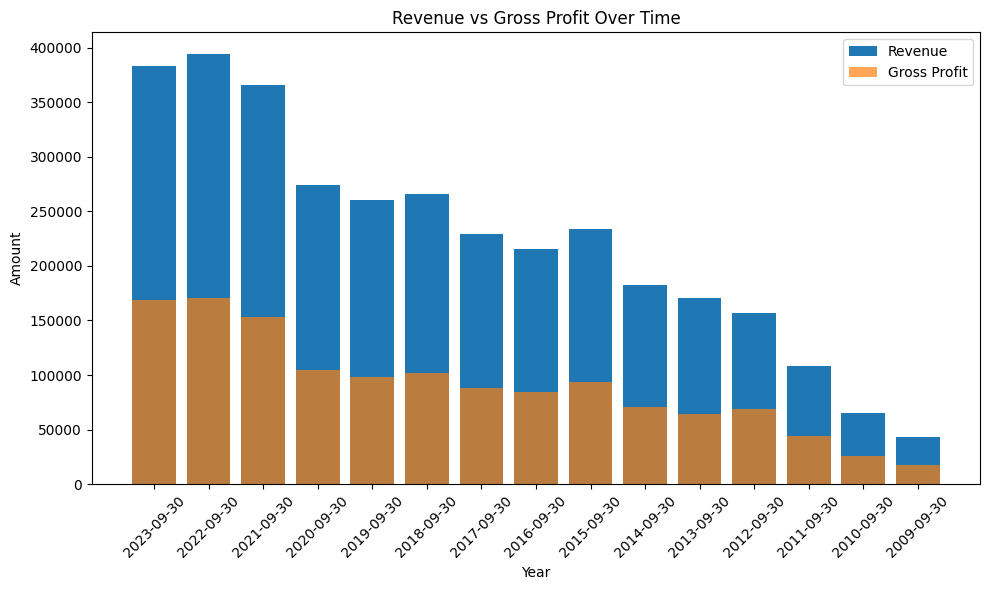

In [ ]:
# Bar chart for Revenue and Gross Profit
plt.figure(figsize=(10, 6))
plt.bar(df.index, df['revenue'], label='Revenue')
plt.bar(df.index, df['gross-profit'], label='Gross Profit', alpha=0.7)
plt.title('Revenue vs Gross Profit Over Time')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


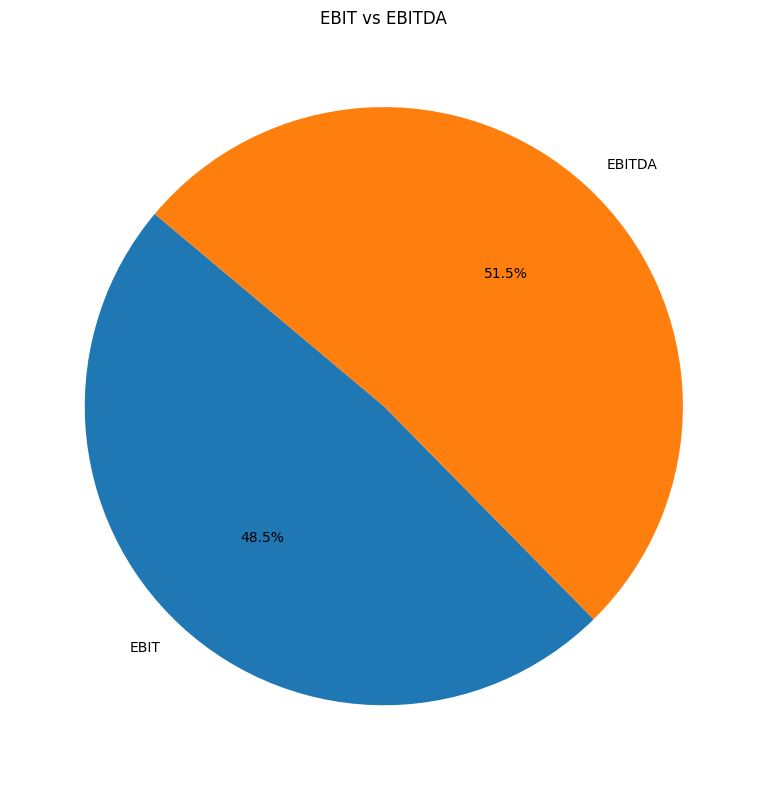

In [ ]:
# Pie chart for EBIT vs EBITDA
plt.figure(figsize=(8, 8))
labels = ['EBIT', 'EBITDA']
sizes = [df['ebit'].iloc[-1], df['ebitda'].iloc[-1]]  # Using the latest values for the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('EBIT vs EBITDA')
plt.tight_layout()
plt.show()


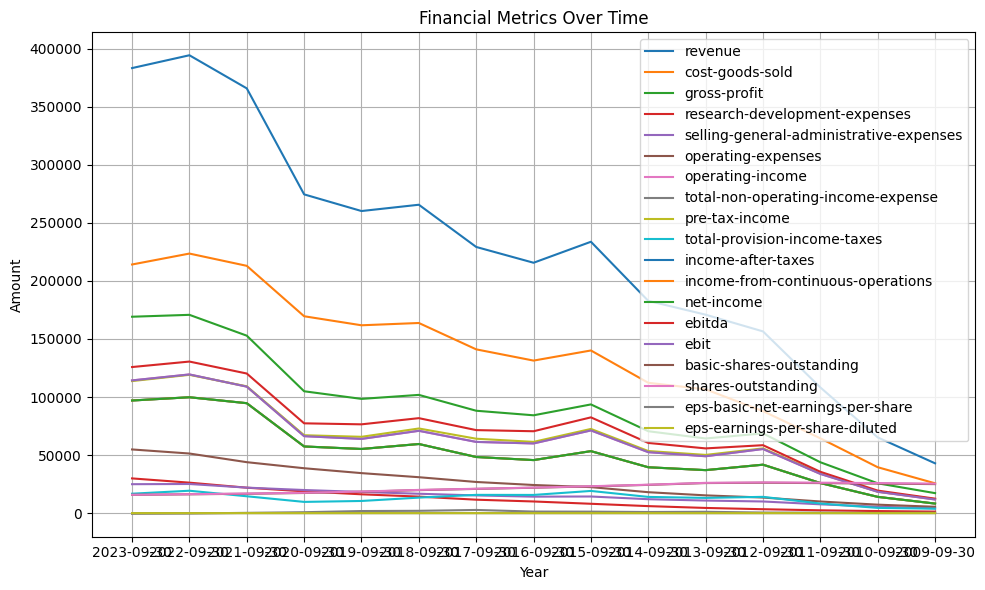

In [ ]:
# Plotting the graph
plt.figure(figsize=(10, 6))
for col in numeric_columns:
    plt.plot(df.index, df[col], label=col)

plt.title('Financial Metrics Over Time')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()